In [1]:
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import os


In [2]:
train_dir = '/content/drive/MyDrive/X-Ray Dataset/xray_dataset_covid19/train'
test_dir = '/content/drive/MyDrive/X-Ray Dataset/xray_dataset_covid19/test'

In [30]:
def create_dataframe(data_path):
    filepaths = []
    labels = []

    for fold in os.listdir(data_path):
        f_path = os.path.join(data_path, fold)
        if os.path.isdir(f_path):
            imgs = os.listdir(f_path)
            for img in imgs:
                img_path = os.path.join(f_path, img)
                filepaths.append(img_path)
                labels.append(fold)

    fseries = pd.Series(filepaths, name='Filepaths')
    lseries = pd.Series(labels, name='Labels')
    return pd.concat([fseries, lseries], axis=1)

In [31]:
train_df = create_dataframe(train_dir)
test_df = create_dataframe(test_dir)

In [3]:
classes_train=os.listdir(train_dir)
classes_test=os.listdir(test_dir)

In [4]:
print(classes_train)

['PNEUMONIA', 'NORMAL']


In [5]:
train_datagen=ImageDataGenerator(
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1.0/255.0,
    width_shift_range=0.10,
    height_shift_range=0.10,
    shear_range=0.1
)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    class_mode='binary',
    color_mode='grayscale',
    batch_size=32,
    target_size=(1000,1000,1)[:2]
)

Found 148 images belonging to 2 classes.


In [6]:
test_datagen=ImageDataGenerator(
    rescale=1.0/255.0
)

test_generator=test_datagen.flow_from_directory(
    test_dir,
    class_mode='binary',
    color_mode='grayscale',
    batch_size=32,
    target_size=(1000,1000,1)[:2]
)

Found 40 images belonging to 2 classes.


In [7]:
earlystop=EarlyStopping(patience=6)

learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_acc',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

In [8]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation = 'relu', input_shape = (1000,1000,1)))
model.add(MaxPooling2D(5,5))
model.add(Conv2D(64, (5,5), activation = 'relu'))
model.add(MaxPooling2D(5,5))
model.add(Conv2D(128,(5,5),activation='relu'))
model.add(MaxPooling2D(5,5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 996, 996, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 199, 199, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 195, 195, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 39, 39, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 35, 35, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 128)         0

In [11]:
callbacks = [earlystop, learning_rate_reduction]

In [33]:
history = model.fit(train_generator, epochs = 10 , validation_data = test_generator, callbacks = callbacks, batch_size = 32)

Epoch 1/10
5/5 [==============================] - ETA: 0s - loss: 0.3926 - accuracy: 0.8378

5/5 [==============================] - 18s 4s/step - loss: 0.3926 - accuracy: 0.8378 - val_loss: 0.0684 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/10
5/5 [==============================] - ETA: 0s - loss: 0.2419 - accuracy: 0.9257

5/5 [==============================] - 15s 3s/step - loss: 0.2419 - accuracy: 0.9257 - val_loss: 0.0589 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/10
5/5 [==============================] - ETA: 0s - loss: 0.2125 - accuracy: 0.8986

5/5 [==============================] - 16s 3s/step - loss: 0.2125 - accuracy: 0.8986 - val_loss: 0.0414 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/10
5/5 [==============================] - ETA: 0s - loss: 0.1944 - accuracy: 0.9324

5/5 [==============================] - 16s 3s/step - loss: 0.1944 - accuracy: 0.9324 - val_loss: 0.0367 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/10
5/5 [==============================] - ETA: 0s - loss: 0.2540 - accuracy: 0.8986

5/5 [==============================] - 16s 3s/step - loss: 0.2540 - accuracy: 0.8986 - val_loss: 0.0372 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/10
5/5 [==============================] - ETA: 0s - loss: 0.2758 - accuracy: 0.9189

5/5 [==============================] - 15s 3s/step - loss: 0.2758 - accuracy: 0.9189 - val_loss: 0.0574 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 7/10
5/5 [==============================] - ETA: 0s - loss: 0.2109 - accuracy: 0.8986

5/5 [==============================] - 16s 3s/step - loss: 0.2109 - accuracy: 0.8986 - val_loss: 0.0599 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 8/10
5/5 [==============================] - ETA: 0s - loss: 0.1894 - accuracy: 0.9257

5/5 [==============================] - 15s 3s/step - loss: 0.1894 - accuracy: 0.9257 - val_loss: 0.0442 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 9/10
5/5 [==============================] - ETA: 0s - loss: 0.3433 - accuracy: 0.8716

5/5 [==============================] - 16s 3s/step - loss: 0.3433 - accuracy: 0.8716 - val_loss: 0.1433 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 10/10
5/5 [==============================] - ETA: 0s - loss: 0.2640 - accuracy: 0.9054

5/5 [==============================] - 16s 3s/step - loss: 0.2640 - accuracy: 0.9054 - val_loss: 0.0518 - val_accuracy: 1.0000 - lr: 0.0010


In [13]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.672414,0.641892,0.674714,0.500,0.001
1,0.578698,0.722973,0.466727,0.650,0.001
2,0.605734,0.662162,0.544834,0.550,0.001
3,0.602143,0.662162,0.490715,0.775,0.001
4,0.529795,0.837838,0.327993,0.975,0.001


<Axes: >

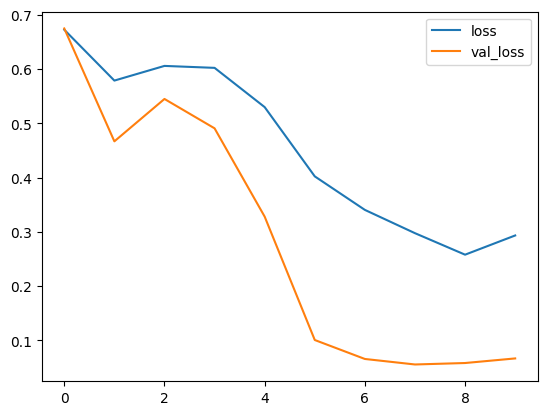

In [14]:
losses[['loss', 'val_loss']].plot()

<Axes: >

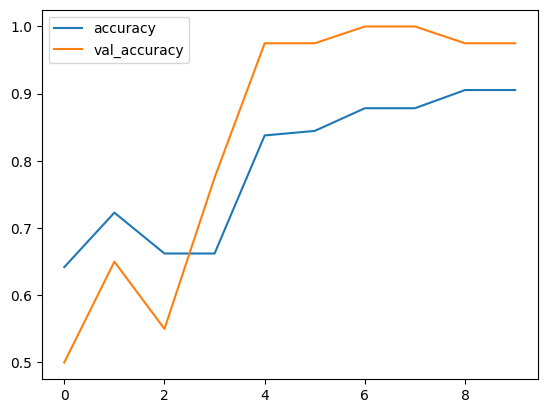

In [15]:
losses[['accuracy', 'val_accuracy']].plot()

<Axes: >

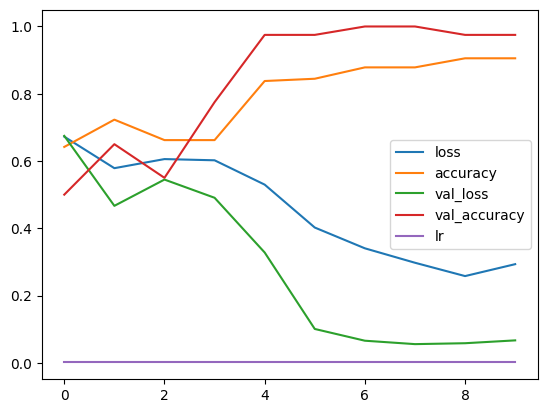

In [16]:
losses.plot()

In [17]:
model.evaluate(test_generator)

2/2 [==============================] - 1s 196ms/step - loss: 0.0667 - accuracy: 0.9750


[0.06670692563056946, 0.9750000238418579]

In [18]:
model_pred = model.predict(test_generator)

2/2 [==============================] - 1s 204ms/step


In [19]:
print(model_pred)

[[7.8116992e-04]
 [9.7722673e-01]
 [8.1762396e-02]
 [6.4229704e-03]
 [9.9416333e-01]
 [1.2333990e-03]
 [9.2368203e-01]
 [9.9365234e-01]
 [9.8636228e-01]
 [9.0579510e-01]
 [1.0172246e-02]
 [8.8780862e-01]
 [3.5025508e-04]
 [1.5375598e-03]
 [9.9135286e-01]
 [9.2019862e-01]
 [9.7659034e-01]
 [2.1571836e-03]
 [5.4654060e-03]
 [9.9807006e-01]
 [1.1255755e-04]
 [3.5962734e-01]
 [2.8174343e-03]
 [2.0189157e-04]
 [1.2052349e-03]
 [9.6021640e-01]
 [9.4311470e-01]
 [8.0775630e-01]
 [4.6257004e-02]
 [6.0384679e-01]
 [5.7577039e-04]
 [3.8769541e-03]
 [9.8287904e-01]
 [9.8286325e-01]
 [4.4868387e-02]
 [9.9707991e-01]
 [1.8644199e-04]
 [8.9892989e-01]
 [4.5874701e-03]
 [3.1801290e-04]]


In [20]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [21]:
class_names = ['NORMAL', 'PNEUMONIA']

In [22]:
def plot_prediction(test_generator, n_images):
  i = 1
  images, labels = test_generator.next()
  predictions = np.argmax(model.predict(images), axis=1)
  labels = labels.astype('int32')
  plt.figure(figsize=(14, 15))
  for image, label in zip(images, labels):
      plt.subplot(4, 3, i)
      plt.imshow(image)
      if predictions[i] == labels[i]:
          title_obj = plt.title(class_names[label])
          plt.setp(title_obj, color='g')
          plt.axis('off')
      else:
          title_obj = plt.title(class_names[label])
          plt.setp(title_obj, color='r')
          plt.axis('off')
      i += 1
      if i == n_images:
          break

  plt.show()

1/1 [==============================] - 0s 259ms/step


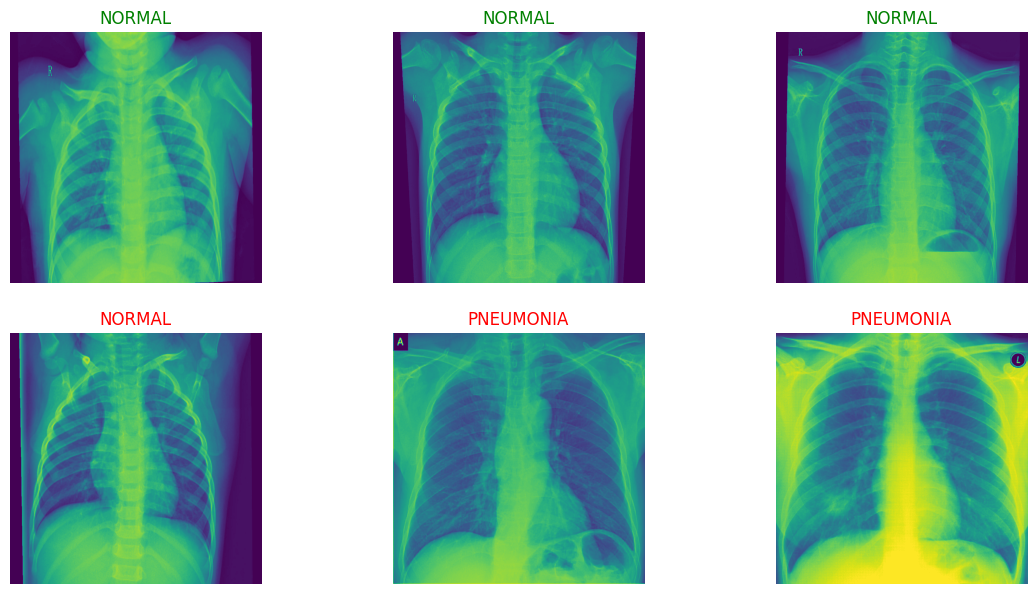

In [23]:
plot_prediction(test_generator, 7)

2/2 [==============================] - 1s 167ms/step


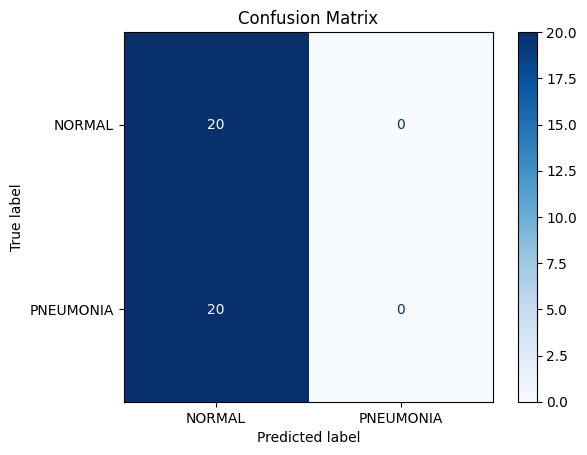

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(test_generator)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes

cm = confusion_matrix(true_classes, predicted_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

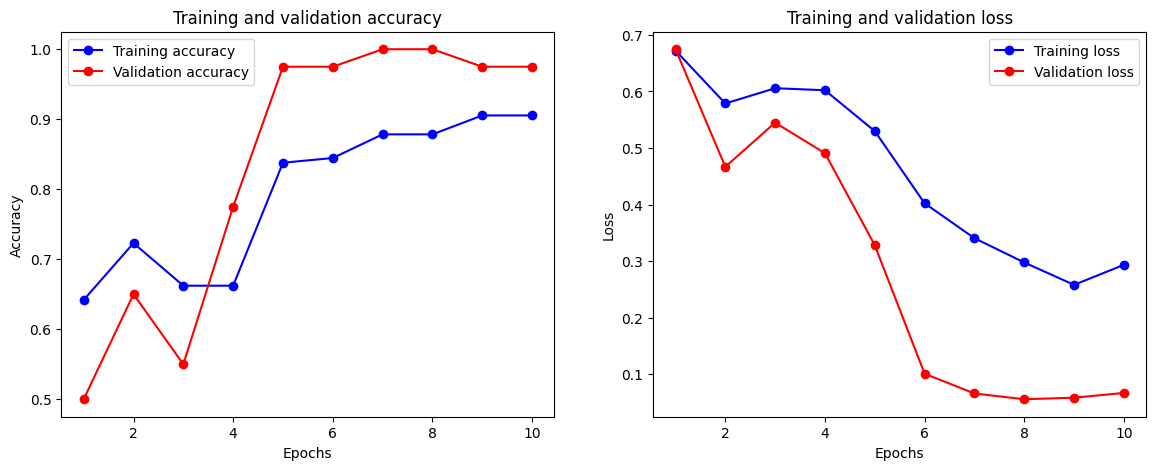

In [25]:
def plot_accuracy_loss(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)

  plt.figure(figsize=(14, 5))

  plt.subplot(1, 2, 1)
  plt.plot(epochs, acc, 'bo-', label='Training accuracy')
  plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(epochs, loss, 'bo-', label='Training loss')
  plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

plot_accuracy_loss(history)